# Format Australia demand data to hourly

I am assuming all times are AEST, taken from here: https://github.com/UNSW-CEEM/NEMOSIS/wiki/Column-Summary

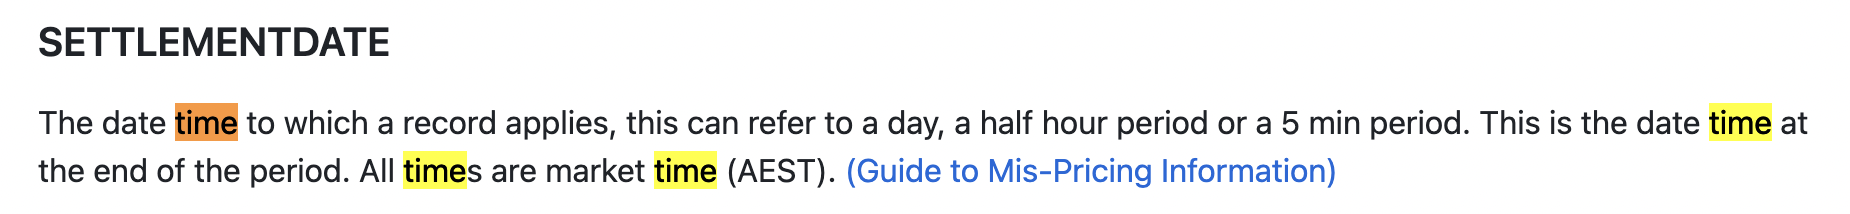

In [2]:
import pandas as pd

In [3]:
data_path = "/g/data/w42/dr6273/work/projects/Aus_energy/data/energy_demand/"

In [4]:
dem = pd.read_csv(
    data_path+"2010_2020demand.zip",
    header=3,
    parse_dates={'timestamp': ['Date','Time']},
    index_col="timestamp",
    usecols=["Date", "Time", "NSW1", "QLD1", "SA1", "TAS1", "VIC1"]
)

Convert to UTC from AEST (makes things easier with climate data)

In [5]:
# dem.index -= pd.DateOffset(hours=10)

In [6]:
dem.loc["2017-01"].head()

,NSW1,QLD1,SA1,TAS1,VIC1
timestamp,,,,,
2017-01-01 00:00:00,7431.17,6728.99,1469.06,894.11,4341.78
2017-01-01 00:30:00,7259.07,6462.14,1395.21,863.08,4097.58
2017-01-01 01:00:00,7046.41,6352.82,1306.86,872.00,4034.74
2017-01-01 01:30:00,6845.24,6261.02,1239.58,852.53,3851.70
2017-01-01 02:00:00,6629.92,6169.66,1173.09,832.05,3649.99


In [7]:
dem = dem.drop_duplicates()

# Update 21/09

Possible problem with the demand data I have. These figures show the 30-min demand from my data, compared with direct download from AEMO (https://www.aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data)for QLD in January 2017.

Inspecting the vlaues shows that they start off the same in both sources, but eventuall diverge

<AxesSubplot: xlabel='timestamp'>

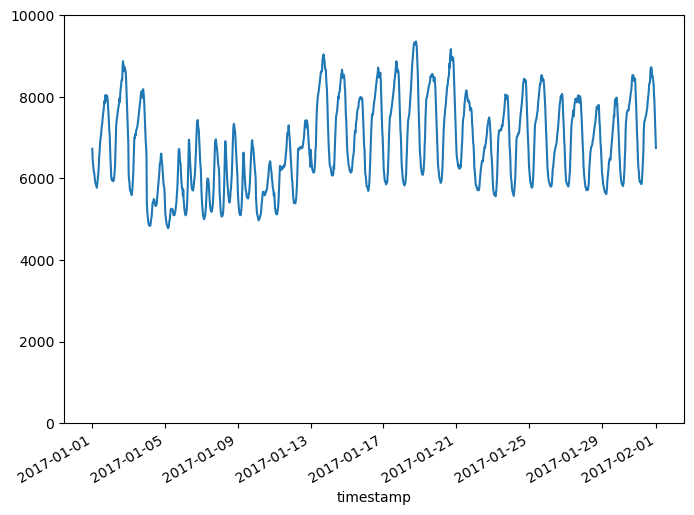

In [8]:
dem["QLD1"].loc["2017-01"].plot(ylim=(0,10000), figsize=(8,6))

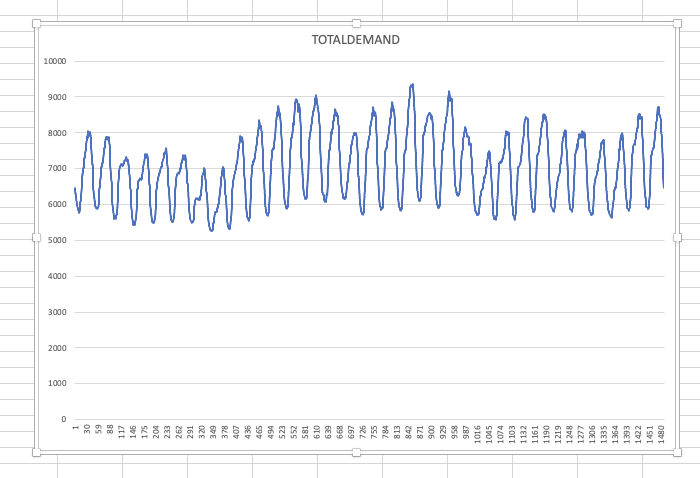

And now for July 2017:

<AxesSubplot: xlabel='timestamp'>

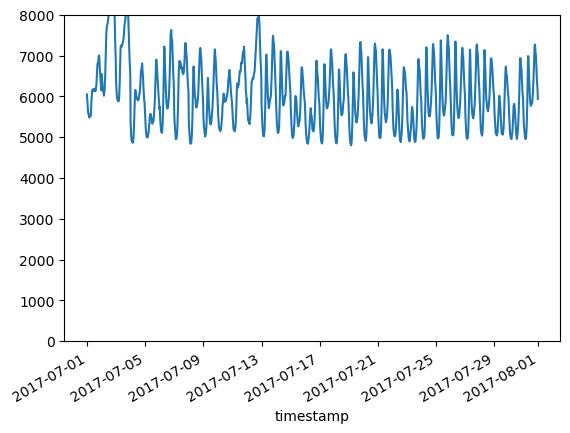

In [9]:
dem["QLD1"].loc["2017-07"].plot(ylim=(0,8000))

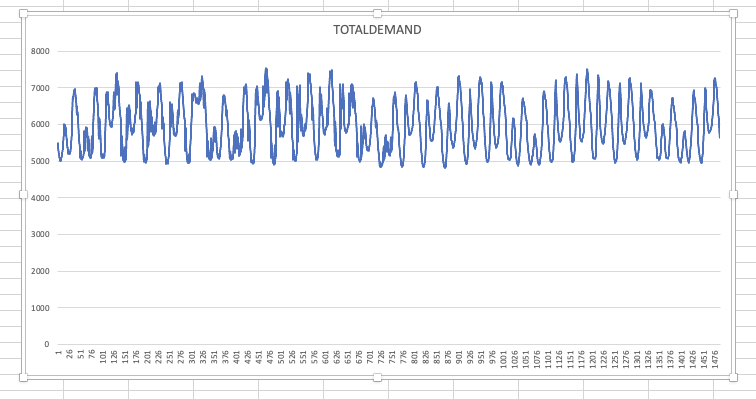

In [24]:
dem = dem.sort_index()

In [25]:
dem.loc["2017-07"].head()

,NSW1,QLD1,SA1,TAS1,VIC1
timestamp,,,,,
2017-07-01 00:00:00,7203.49,6048.72,1935.89,894.45,5037.17
2017-07-01 00:30:00,7000.70,5913.18,1722.52,888.64,4692.99
2017-07-01 01:00:00,6650.97,5820.97,1633.14,883.20,4529.85
2017-07-01 01:30:00,6394.89,5696.19,1583.26,865.00,4326.84
2017-07-01 02:00:00,6152.48,5596.41,1521.79,816.63,4188.87


<AxesSubplot: xlabel='timestamp'>

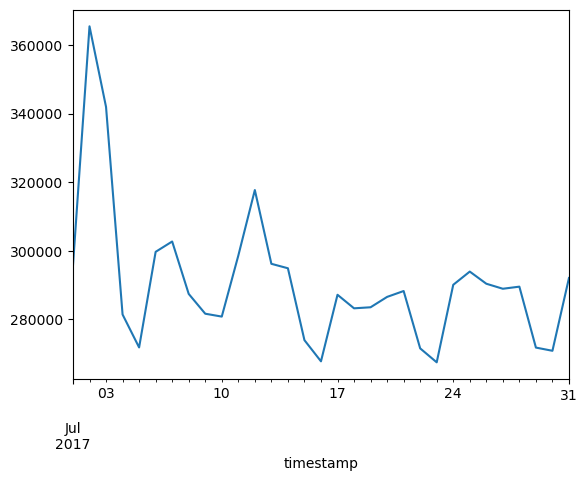

In [26]:
dem["QLD1"].loc["2017-07"].resample("D").sum().plot()

<AxesSubplot: xlabel='timestamp'>

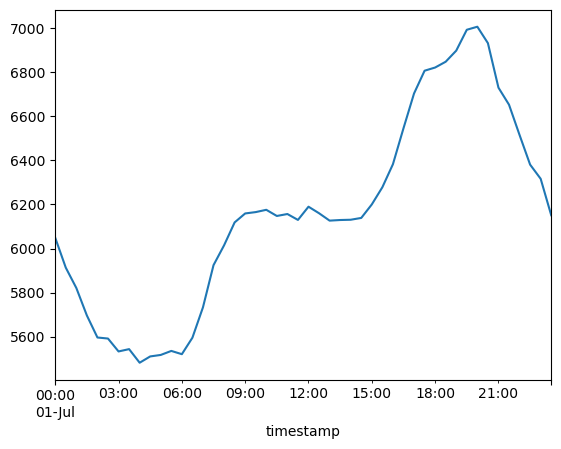

In [27]:
dem["QLD1"].loc["2017-07-01"].plot()

In [28]:
dem["QLD1"].loc["2017-07-01"]

timestamp
2017-07-01 00:00:00    6048.72
2017-07-01 00:30:00    5913.18
2017-07-01 01:00:00    5820.97
2017-07-01 01:30:00    5696.19
2017-07-01 02:00:00    5596.41
2017-07-01 02:30:00    5591.64
2017-07-01 03:00:00    5533.13
2017-07-01 03:30:00    5543.64
2017-07-01 04:00:00    5481.99
2017-07-01 04:30:00    5510.53
2017-07-01 05:00:00    5517.28
2017-07-01 05:30:00    5535.53
2017-07-01 06:00:00    5520.72
2017-07-01 06:30:00    5595.45
2017-07-01 07:00:00    5733.31
2017-07-01 07:30:00    5924.53
2017-07-01 08:00:00    6014.50
2017-07-01 08:30:00    6118.39
2017-07-01 09:00:00    6159.01
2017-07-01 09:30:00    6165.20
2017-07-01 10:00:00    6175.57
2017-07-01 10:30:00    6147.61
2017-07-01 11:00:00    6156.43
2017-07-01 11:30:00    6129.69
2017-07-01 12:00:00    6189.67
2017-07-01 12:30:00    6159.96
2017-07-01 13:00:00    6126.47
2017-07-01 13:30:00    6129.24
2017-07-01 14:00:00    6130.48
2017-07-01 14:30:00    6138.74
2017-07-01 15:00:00    6200.03
2017-07-01 15:30:00    6277.9

The data are in MW. This is the output at any moment. We want to convert this to MWh/day. To convert these 30-minute ratings, we multiply them by 0.5 hours:

In [9]:
dem_mwh = dem / 2

Then we can sum by day

In [12]:
dem_daily = dem_mwh.resample("D").sum()

Remove first and last row as incomplete days

In [14]:
dem_daily = dem_daily.iloc[1:-1]

Rename columns

In [15]:
dem_daily.columns = ["NSW", "QLD", "SA", "TAS", "VIC"]

In [16]:
dem_daily

,NSW,QLD,SA,TAS,VIC
timestamp,,,,,
2010-01-01,200345.265,141770.410,30926.095,24913.555,124188.520
2010-01-02,224883.275,154139.850,35463.230,27495.375,140836.955
2010-01-03,205852.705,155611.165,33345.755,26704.820,135756.785
2010-01-04,200358.115,144340.325,33998.165,27066.485,133162.885
2010-01-05,202376.745,138618.890,33345.325,27855.585,131333.895
...,...,...,...,...,...
2020-12-26,148560.875,133604.660,28401.905,23455.155,89992.680
2020-12-27,163156.770,140284.485,24340.780,24503.505,95380.895
2020-12-28,162005.010,149172.215,22611.945,24423.715,88760.630


Write

In [17]:
dem_daily.to_csv(
    data_path+"daily_demand_2010-2020.csv"
)

Also calculate monthly

In [18]:
dem_monthly = dem_daily.resample("M").sum()

Now exclude last month as missing last day

In [19]:
dem_monthly = dem_monthly.iloc[:-1]

In [20]:
dem_monthly

,NSW,QLD,SA,TAS,VIC
timestamp,,,,,
2010-01-31,6653265.075,4779786.885,1119899.345,839808.660,4257226.965
2010-02-28,5942291.490,4197436.170,1042385.860,741722.895,3882039.230
2010-03-31,6484836.780,4453868.140,1162610.020,839904.655,4352404.185
2010-04-30,6087400.395,4286117.925,1068538.860,825777.605,4116709.020
2010-05-31,6623083.540,4375010.660,1153950.885,905276.190,4374532.445
...,...,...,...,...,...
2020-07-31,6224335.130,4511463.950,1064732.260,896579.810,3902861.640
2020-08-31,5822386.215,4259218.810,985094.185,856388.390,3634618.110
2020-09-30,5276099.810,4137130.950,885641.045,811436.185,3317839.545


In [21]:
dem_monthly.to_csv(
    data_path+"monthly_demand_2010-2020.csv"
)